In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
toyota = pd.read_csv('/content/ToyotaCorolla.csv',encoding = 'latin1')

In [3]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [5]:
toyota.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [6]:
toyota2 = pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)
toyota2

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [7]:
toyota3 = toyota2.rename({'Age_08_04':'age','Quarterly_Tax':'quaterlytax'},axis=1)

In [8]:
toyota3

,Price,age,KM,HP,cc,Doors,Gears,quaterlytax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [9]:
toyota3[toyota3.duplicated()]

,Price,age,KM,HP,cc,Doors,Gears,quaterlytax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [10]:
toyota4 = toyota3.drop_duplicates()

In [11]:
toyota4

,Price,age,KM,HP,cc,Doors,Gears,quaterlytax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [12]:
toyota4.describe()

,Price,age,KM,HP,cc,Doors,Gears,quaterlytax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [13]:
toyota4.corr()

,Price,age,KM,HP,cc,Doors,Gears,quaterlytax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
quaterlytax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


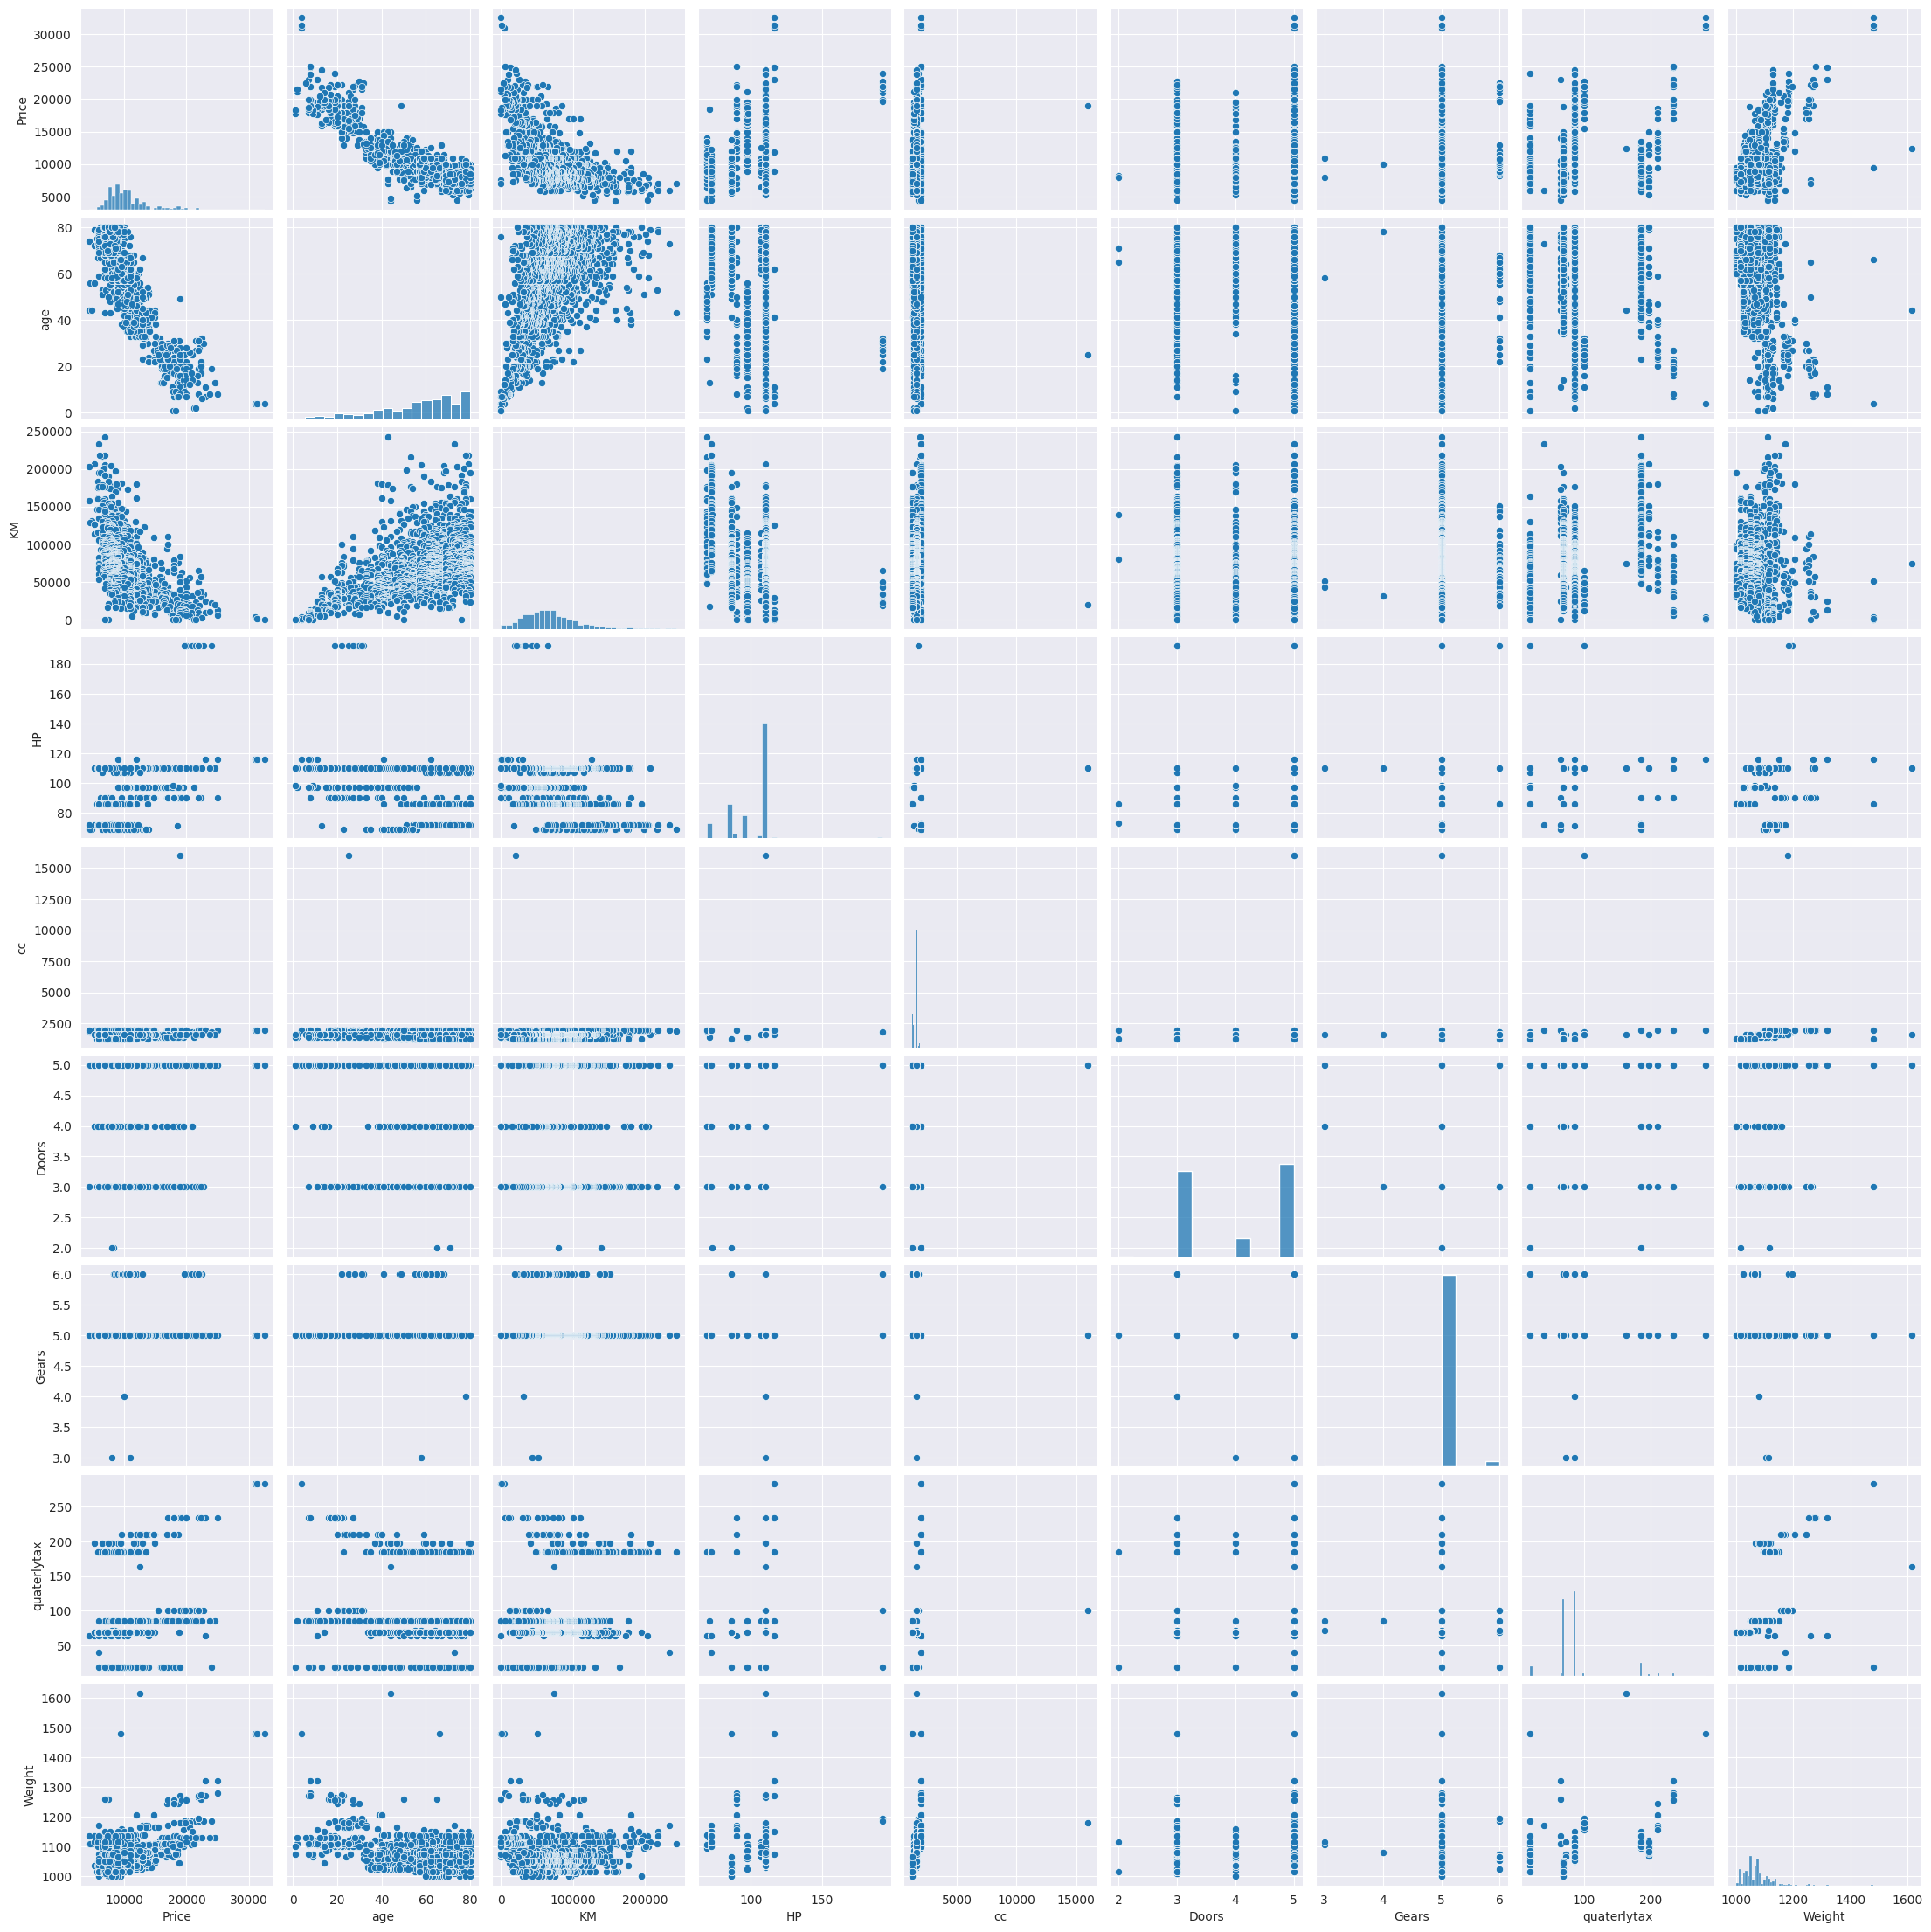

In [14]:
sns.set_style(style='darkgrid')
sns.pairplot(toyota4)

Model building

In [15]:
toyota4.columns

Index(['Price', 'age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'quaterlytax',
       'Weight'],
      dtype='object')

In [16]:
model = smf.ols('Price~age+KM+HP+cc+Doors+Gears+quaterlytax+Weight',data=toyota4).fit()

In [17]:
model.params

Intercept     -5472.540368
age            -121.713891
KM               -0.020737
HP               31.584612
cc               -0.118558
Doors            -0.920189
Gears           597.715894
quaterlytax       3.858805
Weight           16.855470
dtype: float64

In [18]:
#t values and p values
model.tvalues,np.round(model.pvalues,5)

(Intercept      -3.875273
 age           -46.551876
 KM            -16.552424
 HP             11.209719
 cc             -1.316436
 Doors          -0.023012
 Gears           3.034563
 quaterlytax     2.944198
 Weight         15.760663
 dtype: float64,
 Intercept      0.00011
 age            0.00000
 KM             0.00000
 HP             0.00000
 cc             0.18824
 Doors          0.98164
 Gears          0.00245
 quaterlytax    0.00329
 Weight         0.00000
 dtype: float64)

In [19]:
model.rsquared,model.rsquared_adj

(0.8625200256947001, 0.8617487495415147)

In [20]:
ccm = smf.ols('Price~cc',data=toyota4).fit()

In [21]:
ccm.tvalues,ccm.pvalues

(Intercept    24.879592
 cc            4.745039
 dtype: float64,
 Intercept    7.236022e-114
 cc            2.292856e-06
 dtype: float64)

In [22]:
doo = smf.ols('Price~Doors',data=toyota4).fit()

In [23]:
doo.tvalues,doo.pvalues

(Intercept    19.421546
 Doors         7.070520
 dtype: float64,
 Intercept    8.976407e-75
 Doors        2.404166e-12
 dtype: float64)

In [24]:
cmm_doo = smf.ols('Price~cc+Doors',data = toyota4).fit() 

In [25]:
cmm_doo.tvalues,cmm_doo.pvalues

(Intercept    12.786341
 cc            4.268006
 Doors         6.752236
 dtype: float64,
 Intercept    1.580945e-35
 cc           2.101878e-05
 Doors        2.109558e-11
 dtype: float64)

In [26]:
toyota4.columns

Index(['Price', 'age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'quaterlytax',
       'Weight'],
      dtype='object')

Model validation

In [27]:
#collinearity 

rsquared_age = smf.ols('age~KM+HP+cc+Doors+Gears+quaterlytax+Weight',data=toyota4).fit().rsquared
vif_age = 1/(1-rsquared_age)

rsquared_hp = smf.ols('HP~age+age+cc+Doors+Gears+quaterlytax+Weight',data=toyota4).fit().rsquared
vif_hp = 1/(1-rsquared_hp)

rsquared_km = smf.ols('KM~age+HP+cc+Doors+Gears+quaterlytax+Weight',data=toyota4).fit().rsquared
vif_km = 1/(1-rsquared_km)

rsquared_cc = smf.ols('cc~KM+HP+age+Doors+Gears+quaterlytax+Weight',data=toyota4).fit().rsquared
vif_cc = 1/(1-rsquared_cc)

rsquared_doors = smf.ols('Doors~KM+HP+cc+age+Gears+quaterlytax+Weight',data=toyota4).fit().rsquared
vif_doors = 1/(1-rsquared_doors)

rsquared_gears = smf.ols('Gears~KM+HP+cc+Doors+age+quaterlytax+Weight',data=toyota4).fit().rsquared
vif_gears = 1/(1-rsquared_gears)

rsquared_weight = smf.ols('Weight~KM+HP+cc+Doors+Gears+quaterlytax+age',data=toyota4).fit().rsquared
vif_weight = 1/(1-rsquared_weight)

rsquared_quaterlytax = smf.ols('quaterlytax~KM+HP+cc+Doors+Gears+age+Weight',data=toyota4).fit().rsquared
vif_quaterlytax = 1/(1-rsquared_quaterlytax)

d1 = {'varaibles':['age','KM','HP','cc','Doors','Gears','Weight','quaterlytax'],
      'vif':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_gears,vif_weight,vif_quaterlytax]}
vif_dataframe = pd.DataFrame(d1)
vif_dataframe

,varaibles,vif
0,age,1.876236
1,KM,1.757178
2,HP,1.363168
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Weight,2.487180
7,quaterlytax,2.295375


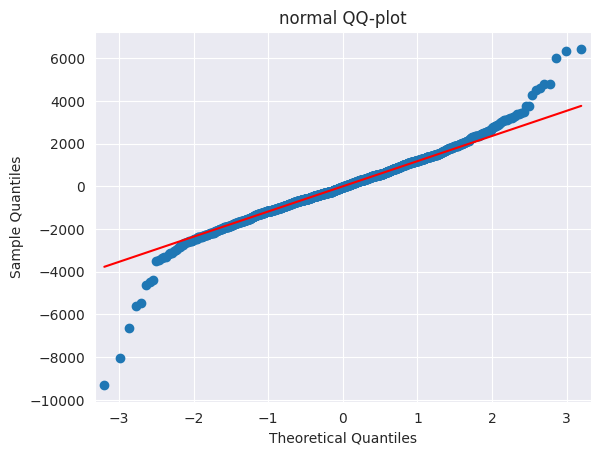

In [28]:
#residul anyalisis

sm.qqplot(model.resid,line='q')
plt.title('normal QQ-plot')
plt.show()

In [29]:
list(np.where(model.resid>6000))

[array([109, 146, 522])]

In [30]:
list(np.where(model.resid<-6000))

[array([220, 600, 959])]

In [31]:
def standard_values(vals):
  return(vals - vals.mean())/vals.std()

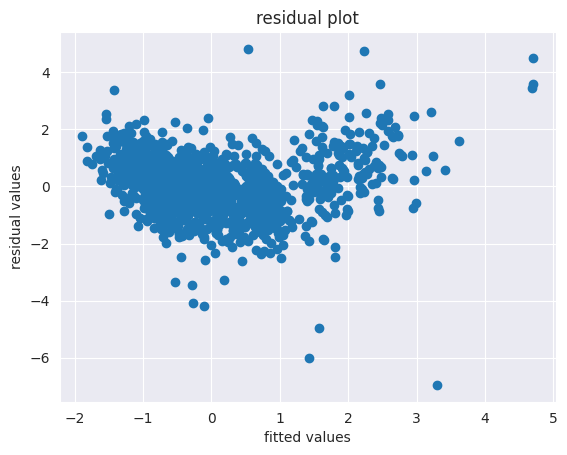

In [32]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title("residual plot")
plt.xlabel('fitted values')
plt.ylabel('residual values')
plt.show()

eval_env: 1


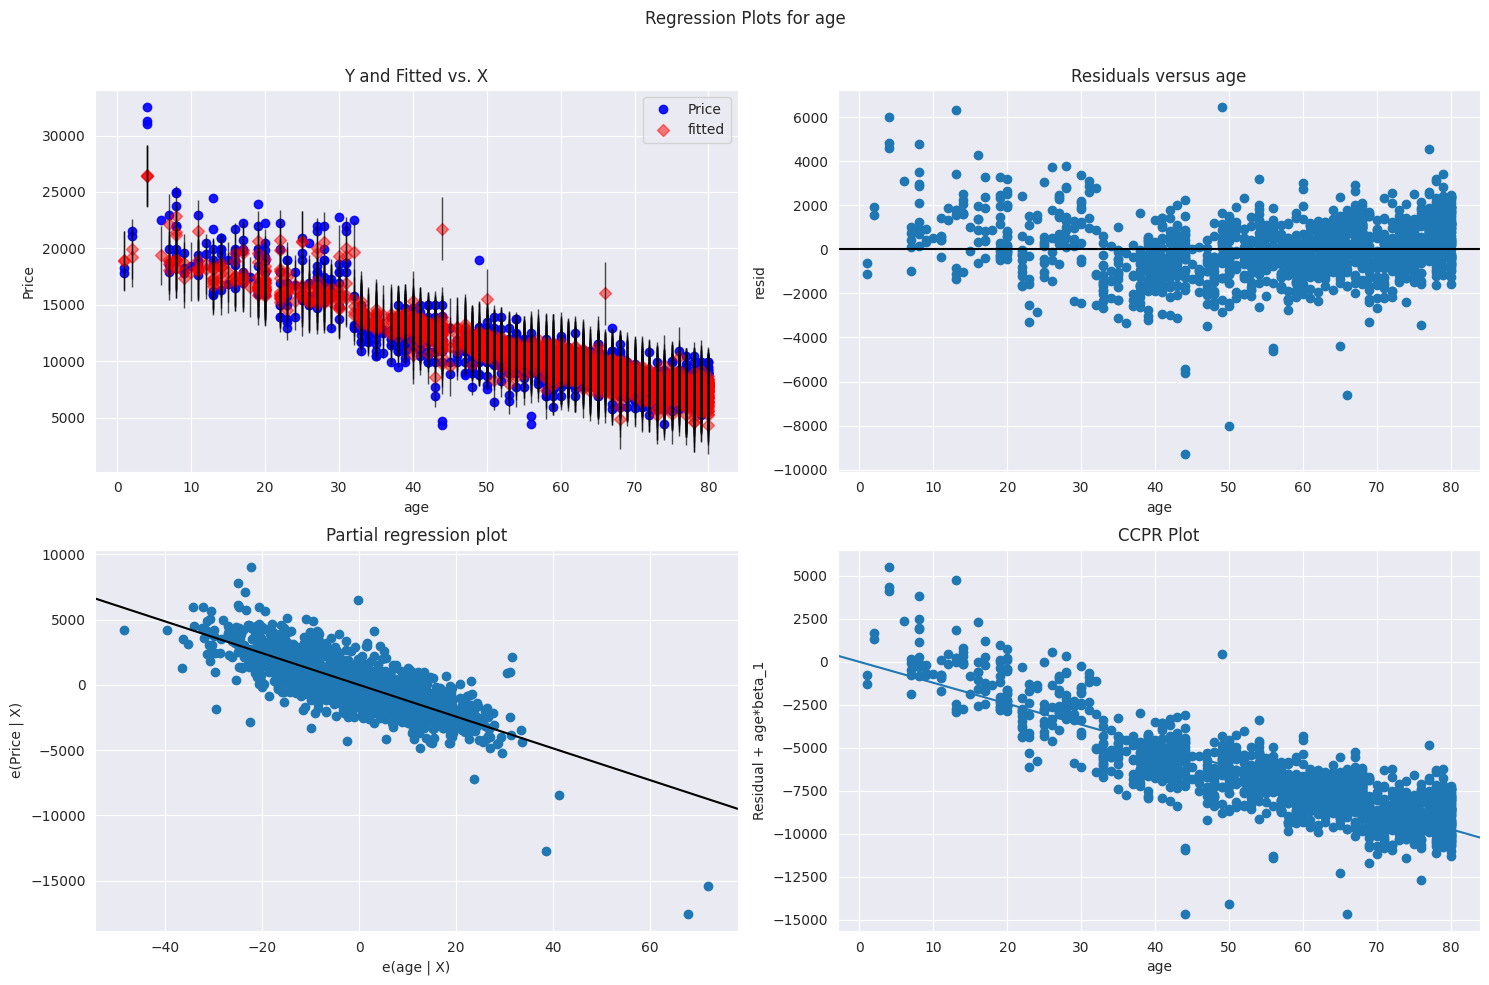

In [33]:
#residual vs regressor
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'age',fig=fig)
plt.show()

eval_env: 1


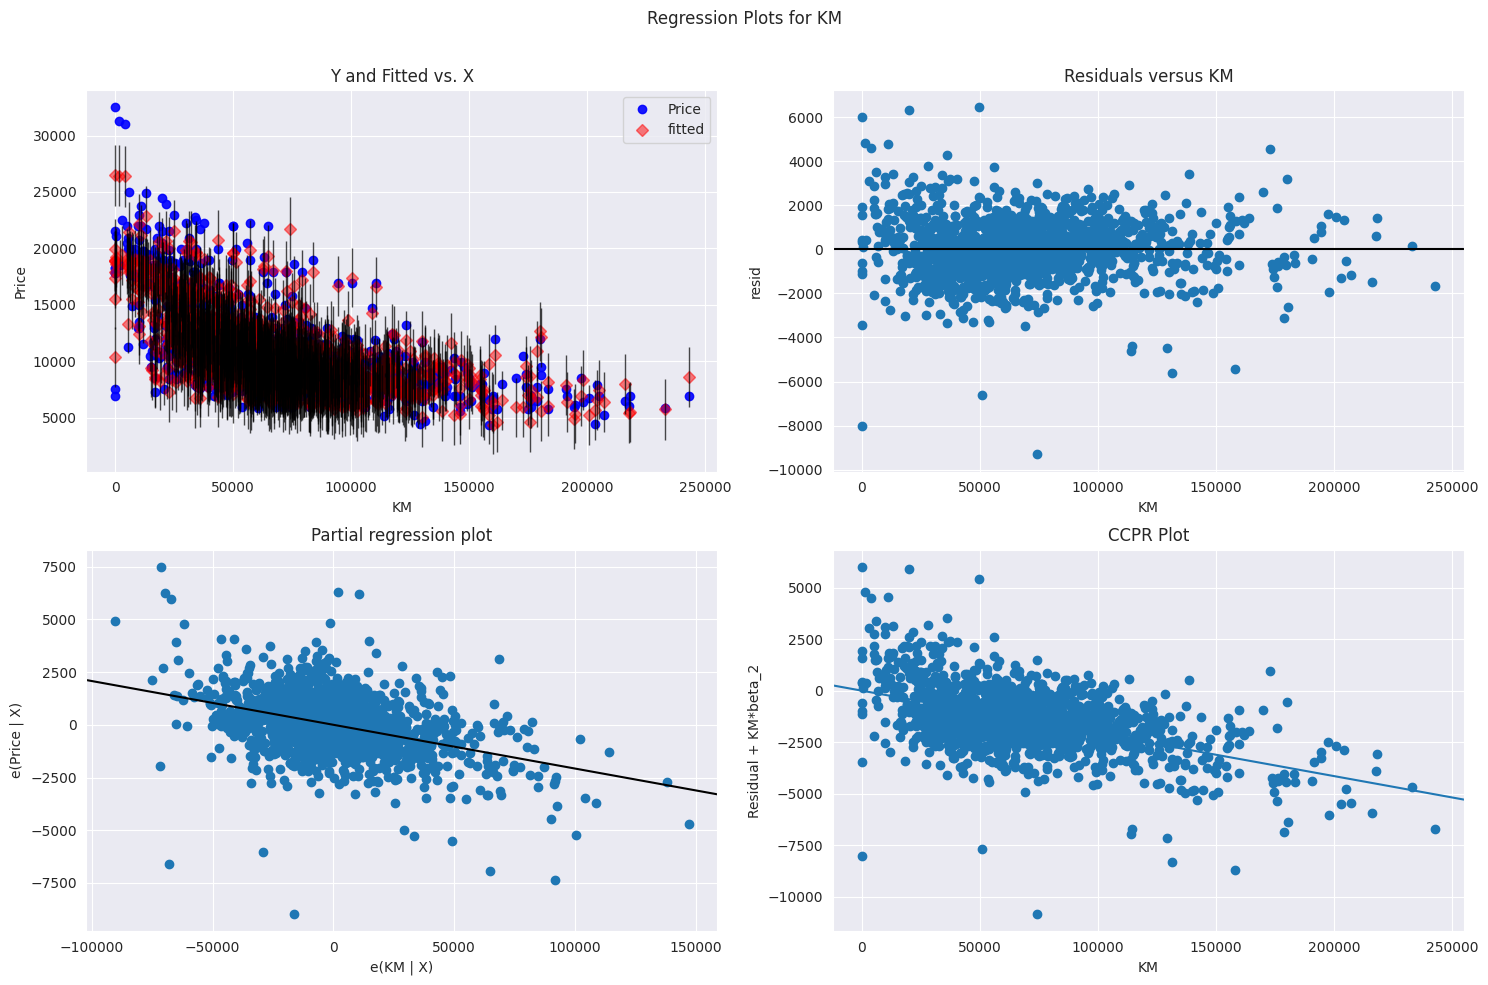

In [34]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

eval_env: 1


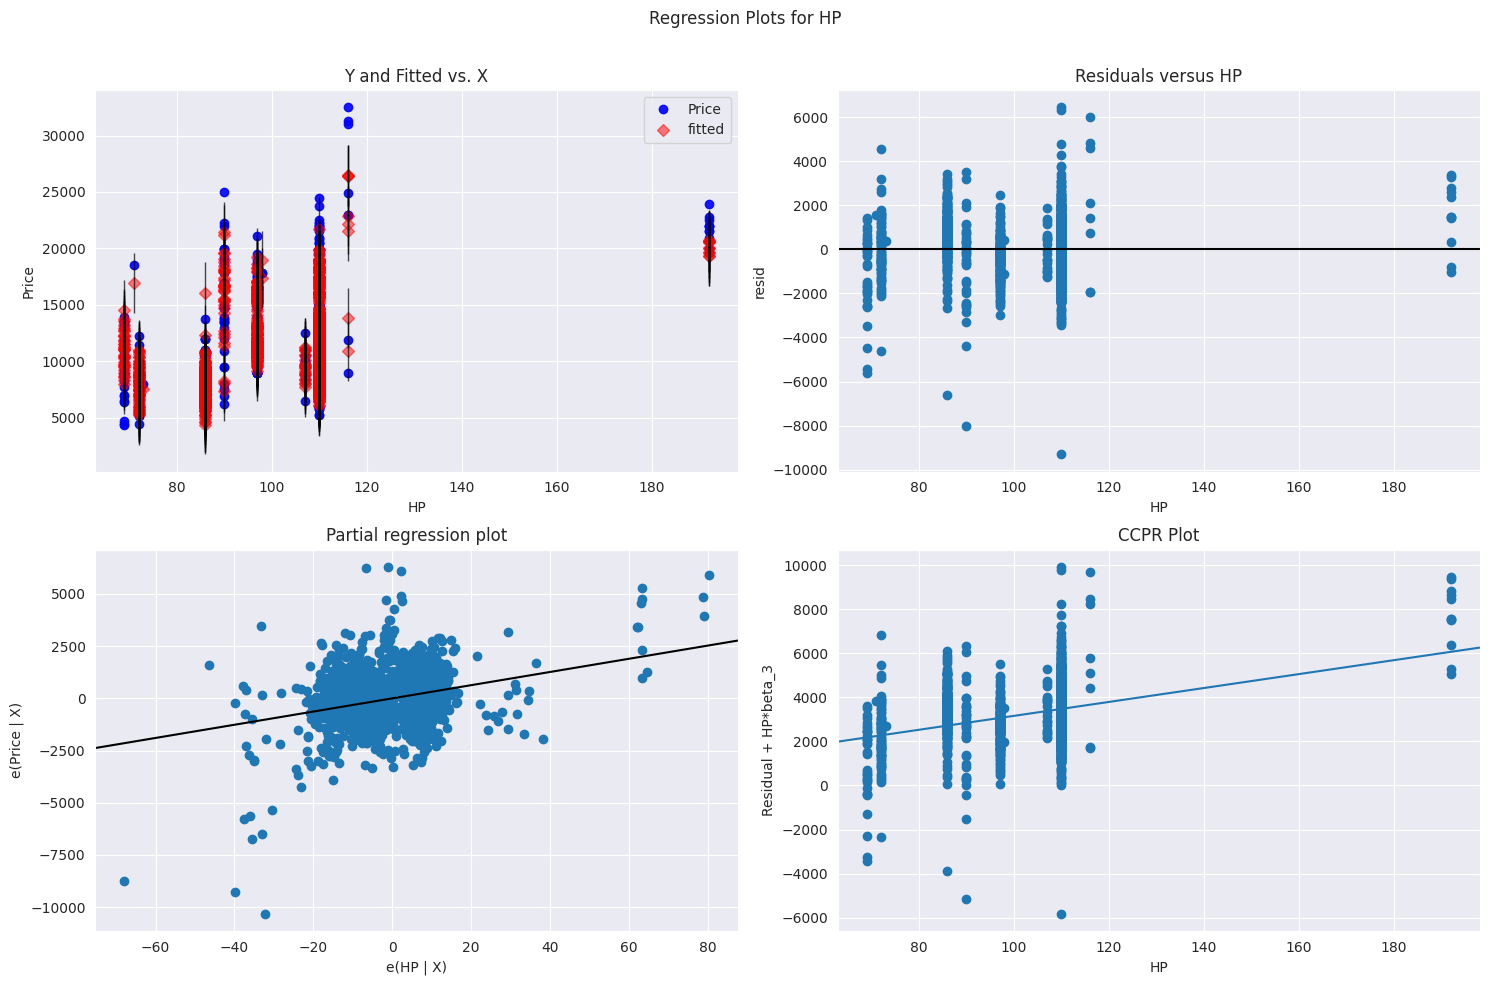

In [35]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

eval_env: 1


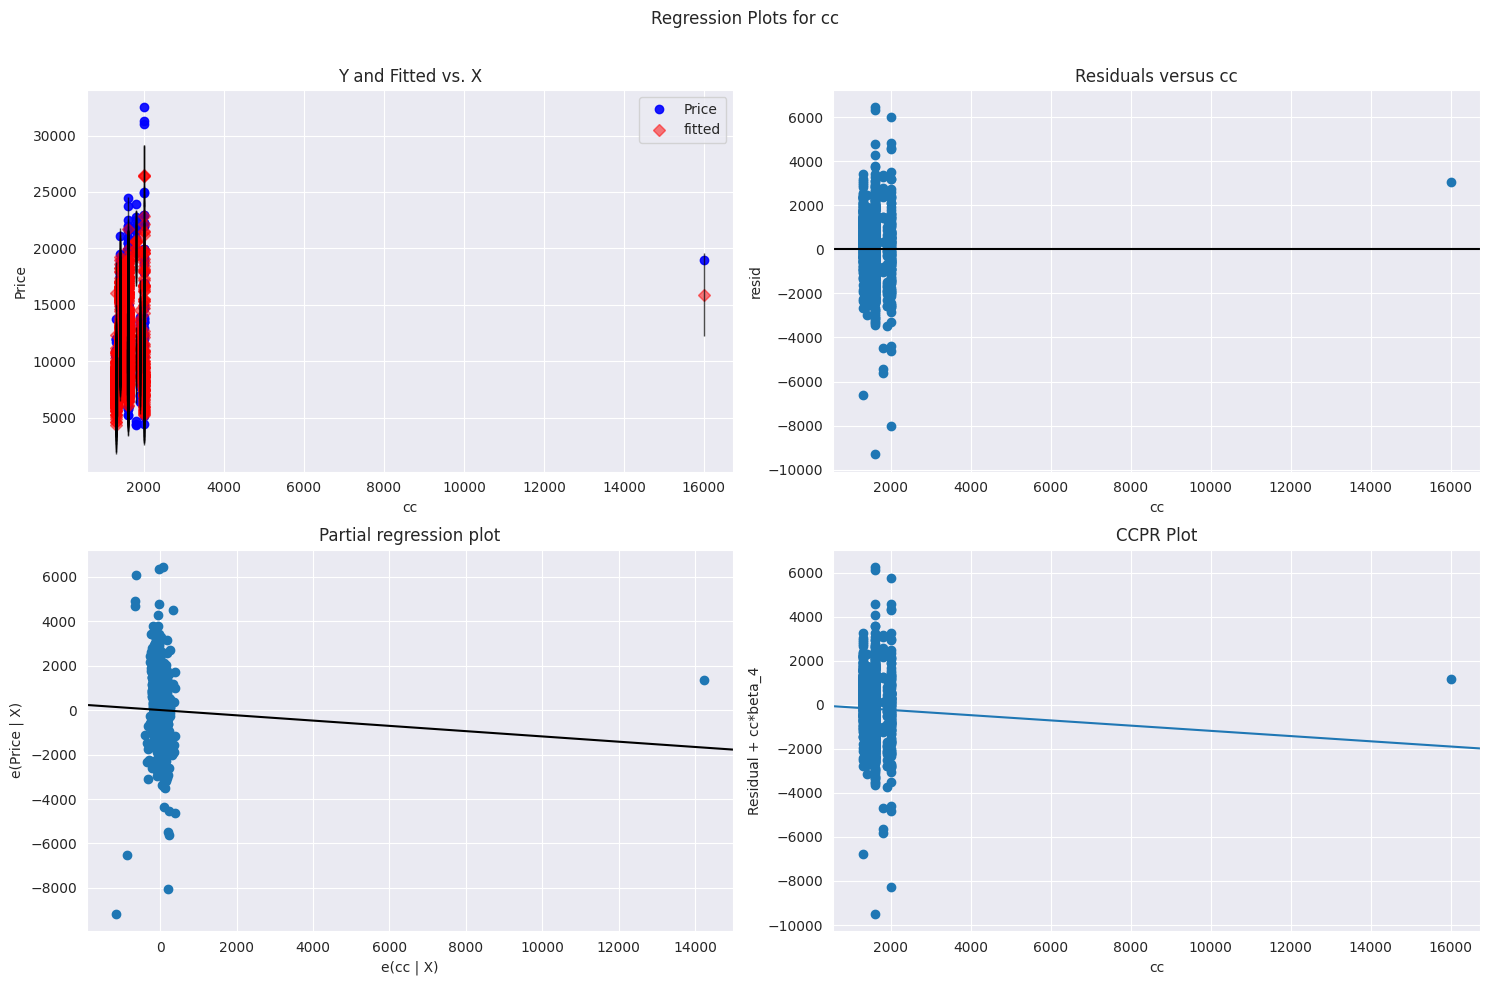

In [36]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

eval_env: 1


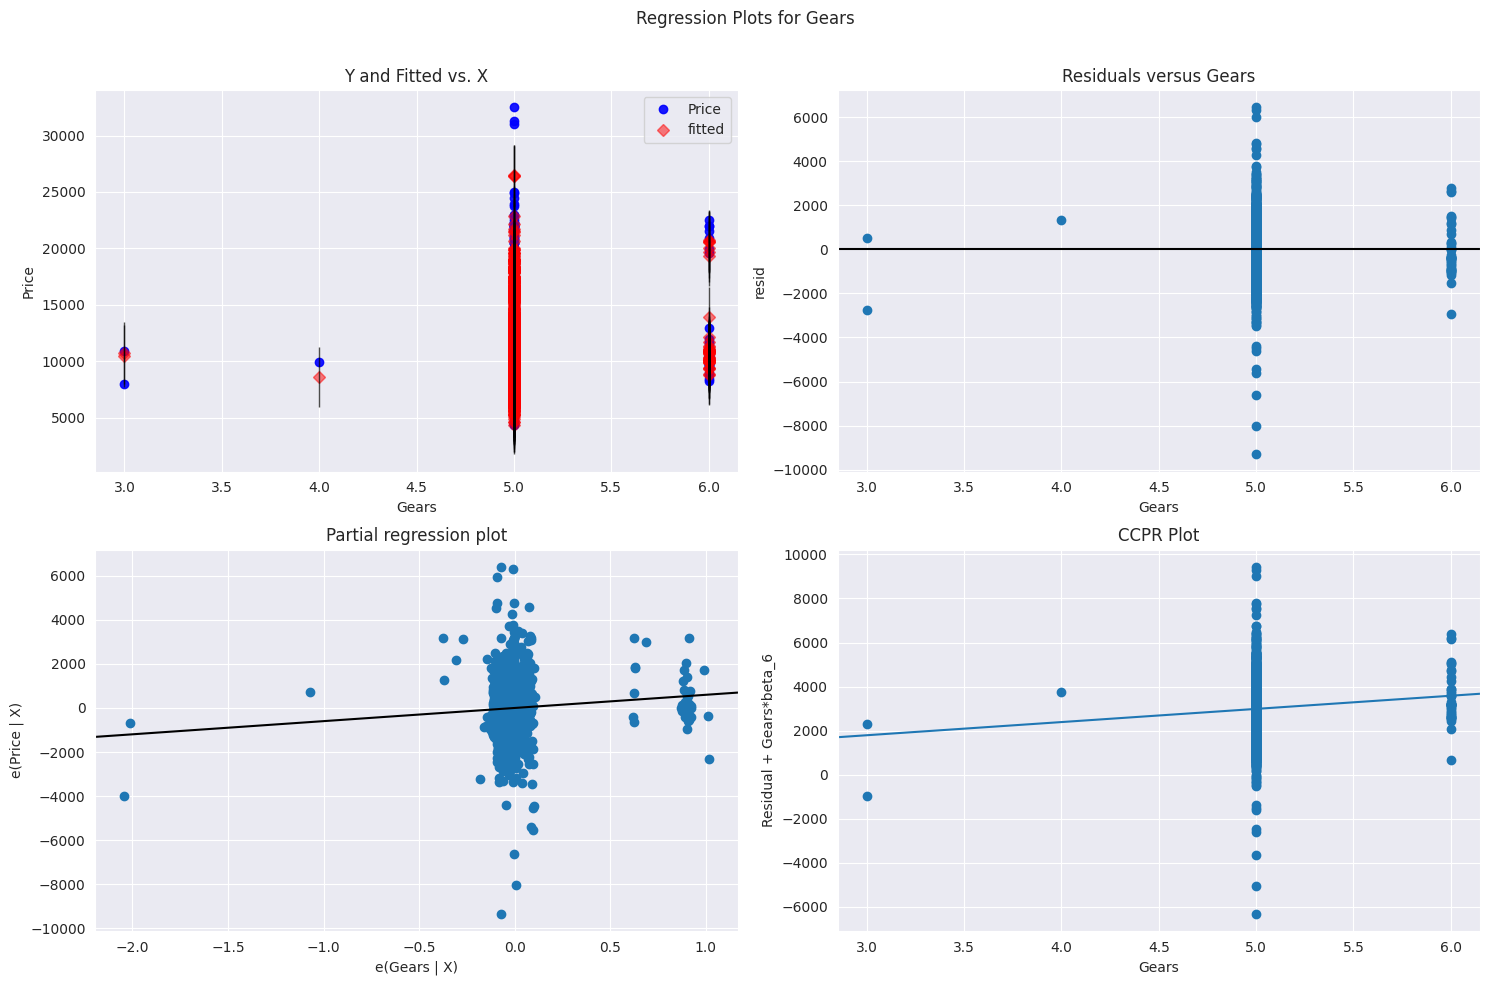

In [37]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

eval_env: 1


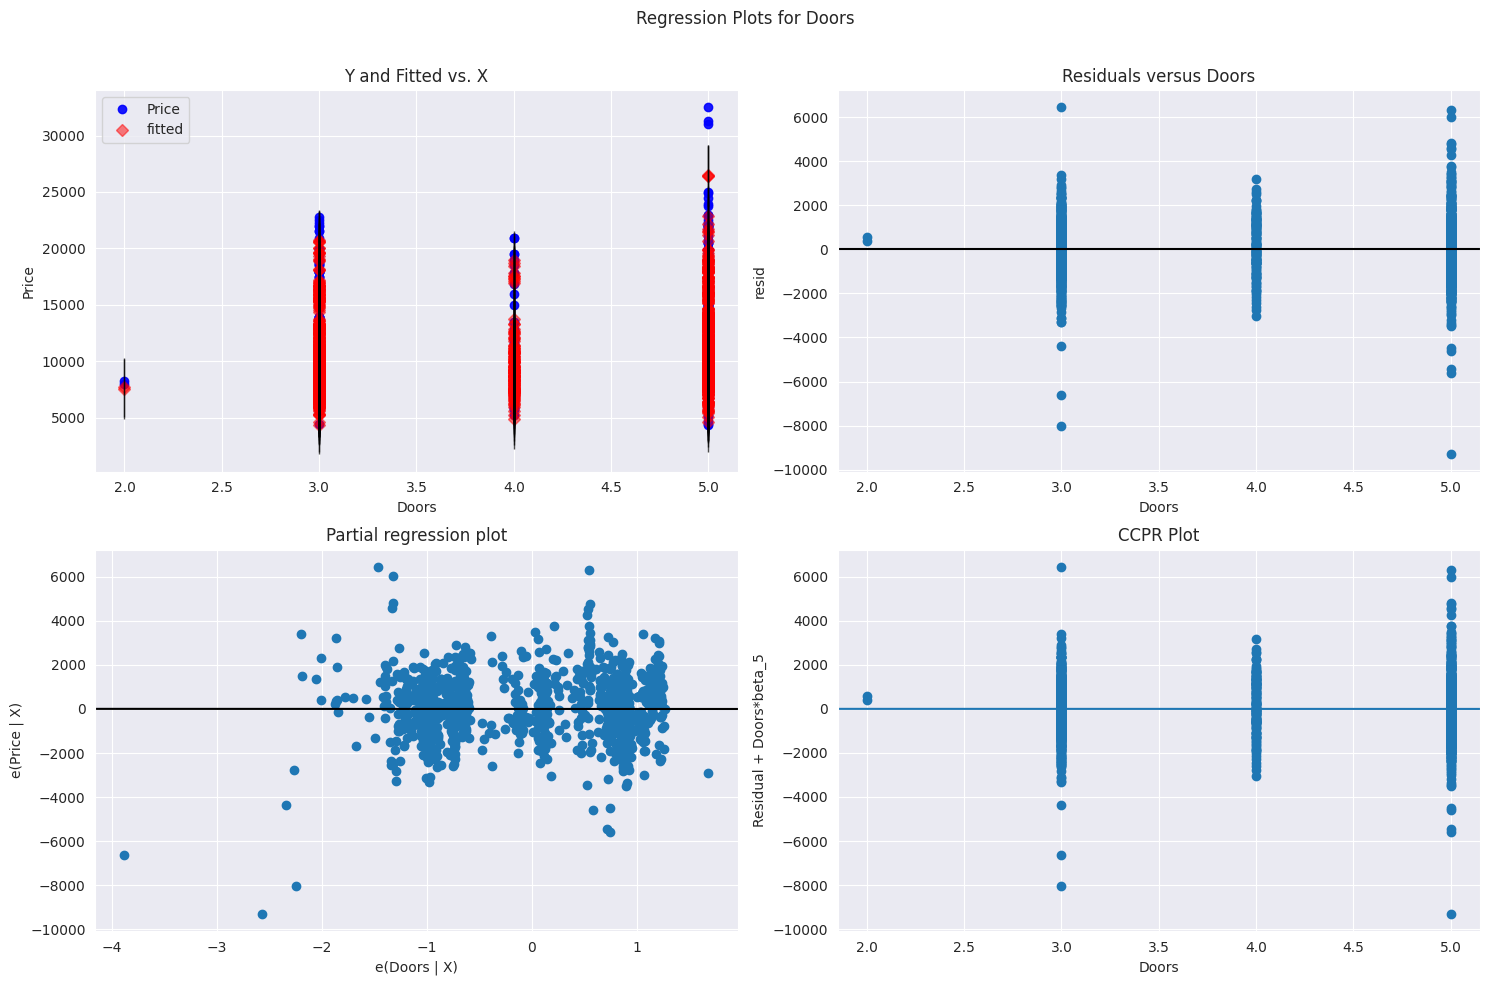

In [38]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

eval_env: 1


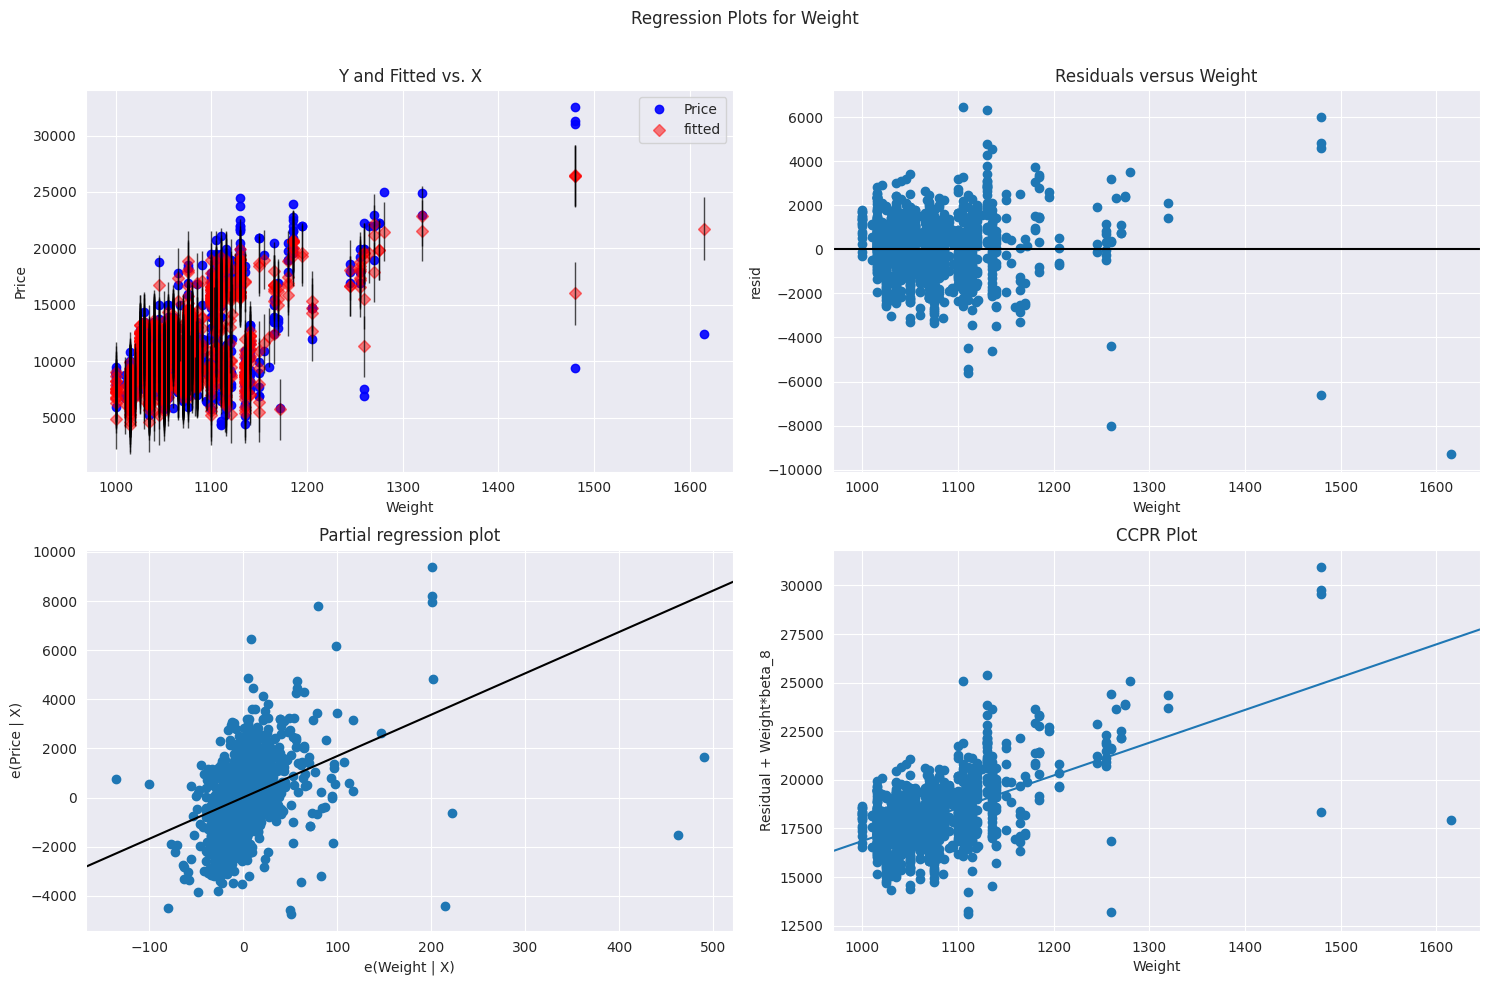

In [39]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

eval_env: 1


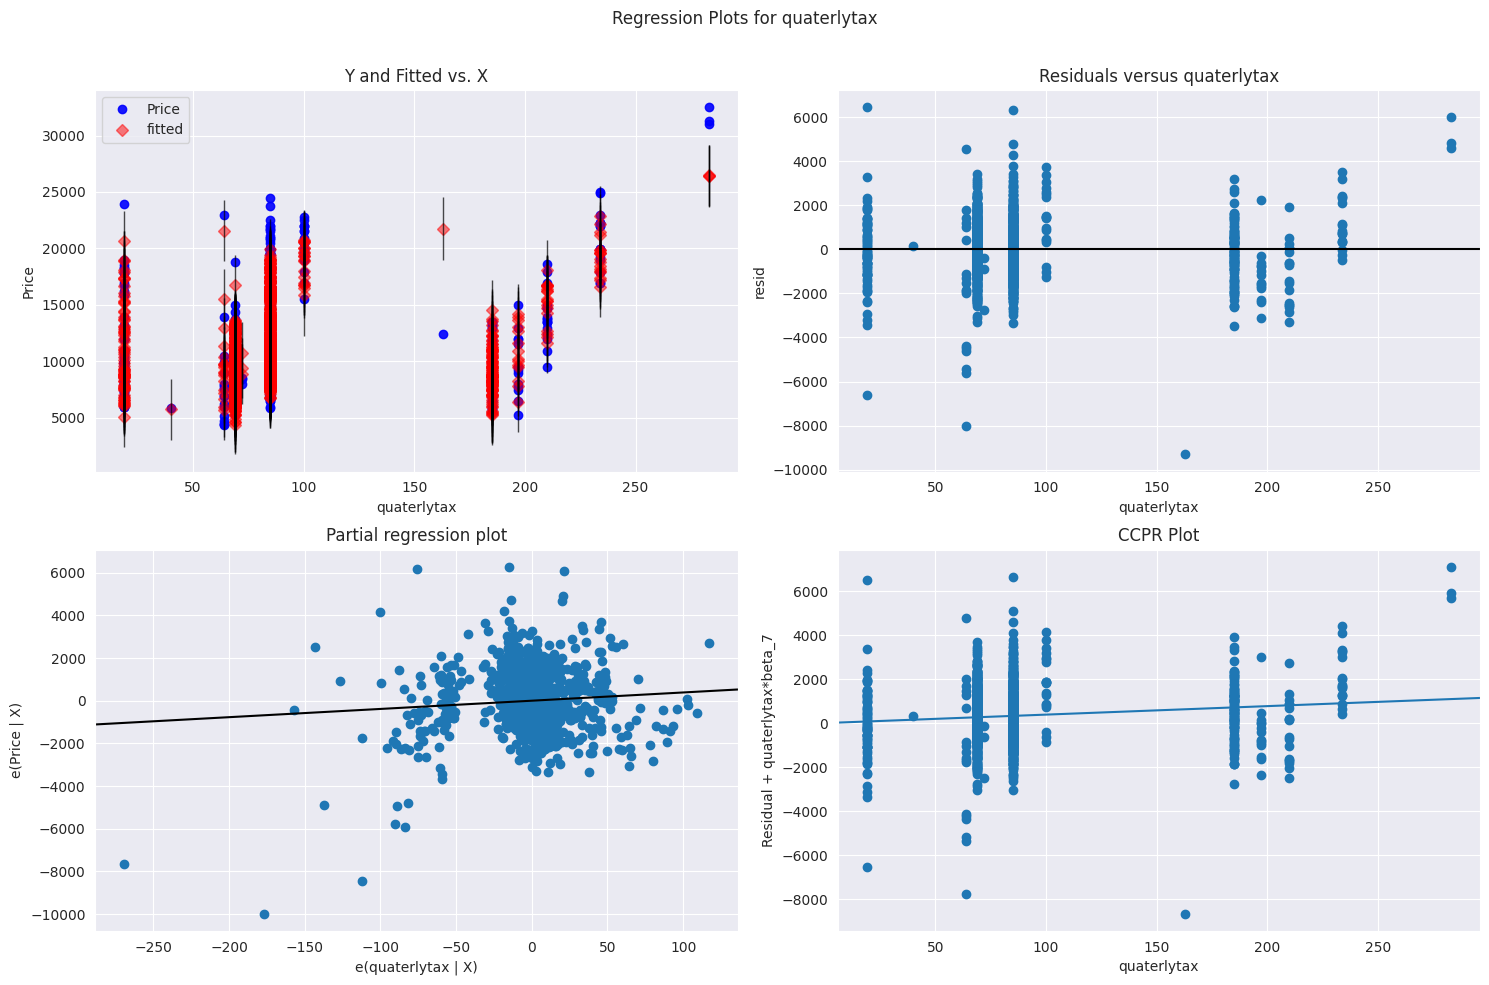

In [40]:
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_regress_exog(model,'quaterlytax',fig=fig)
plt.show()

Model deletion 

In [41]:
from statsmodels.graphics.regressionplots import influence_plot

In [42]:
(c,_)=model.get_influence().cooks_distance

In [43]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

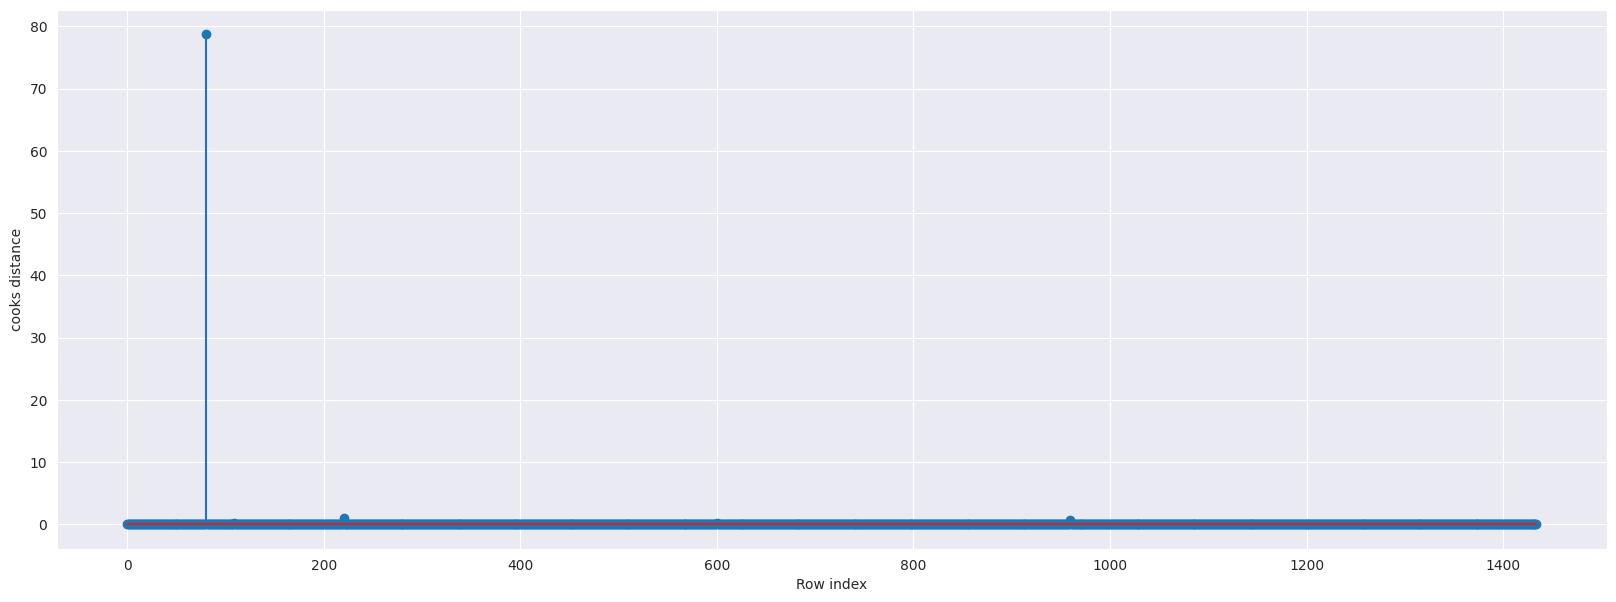

In [44]:
# influencers values
fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(toyota4)),np.round(c,3))
plt.xlabel("Row index")
plt.ylabel("cooks distance")
plt.show()

In [45]:
np.argmax(c),np.max(c)

(80, 78.72950582258932)

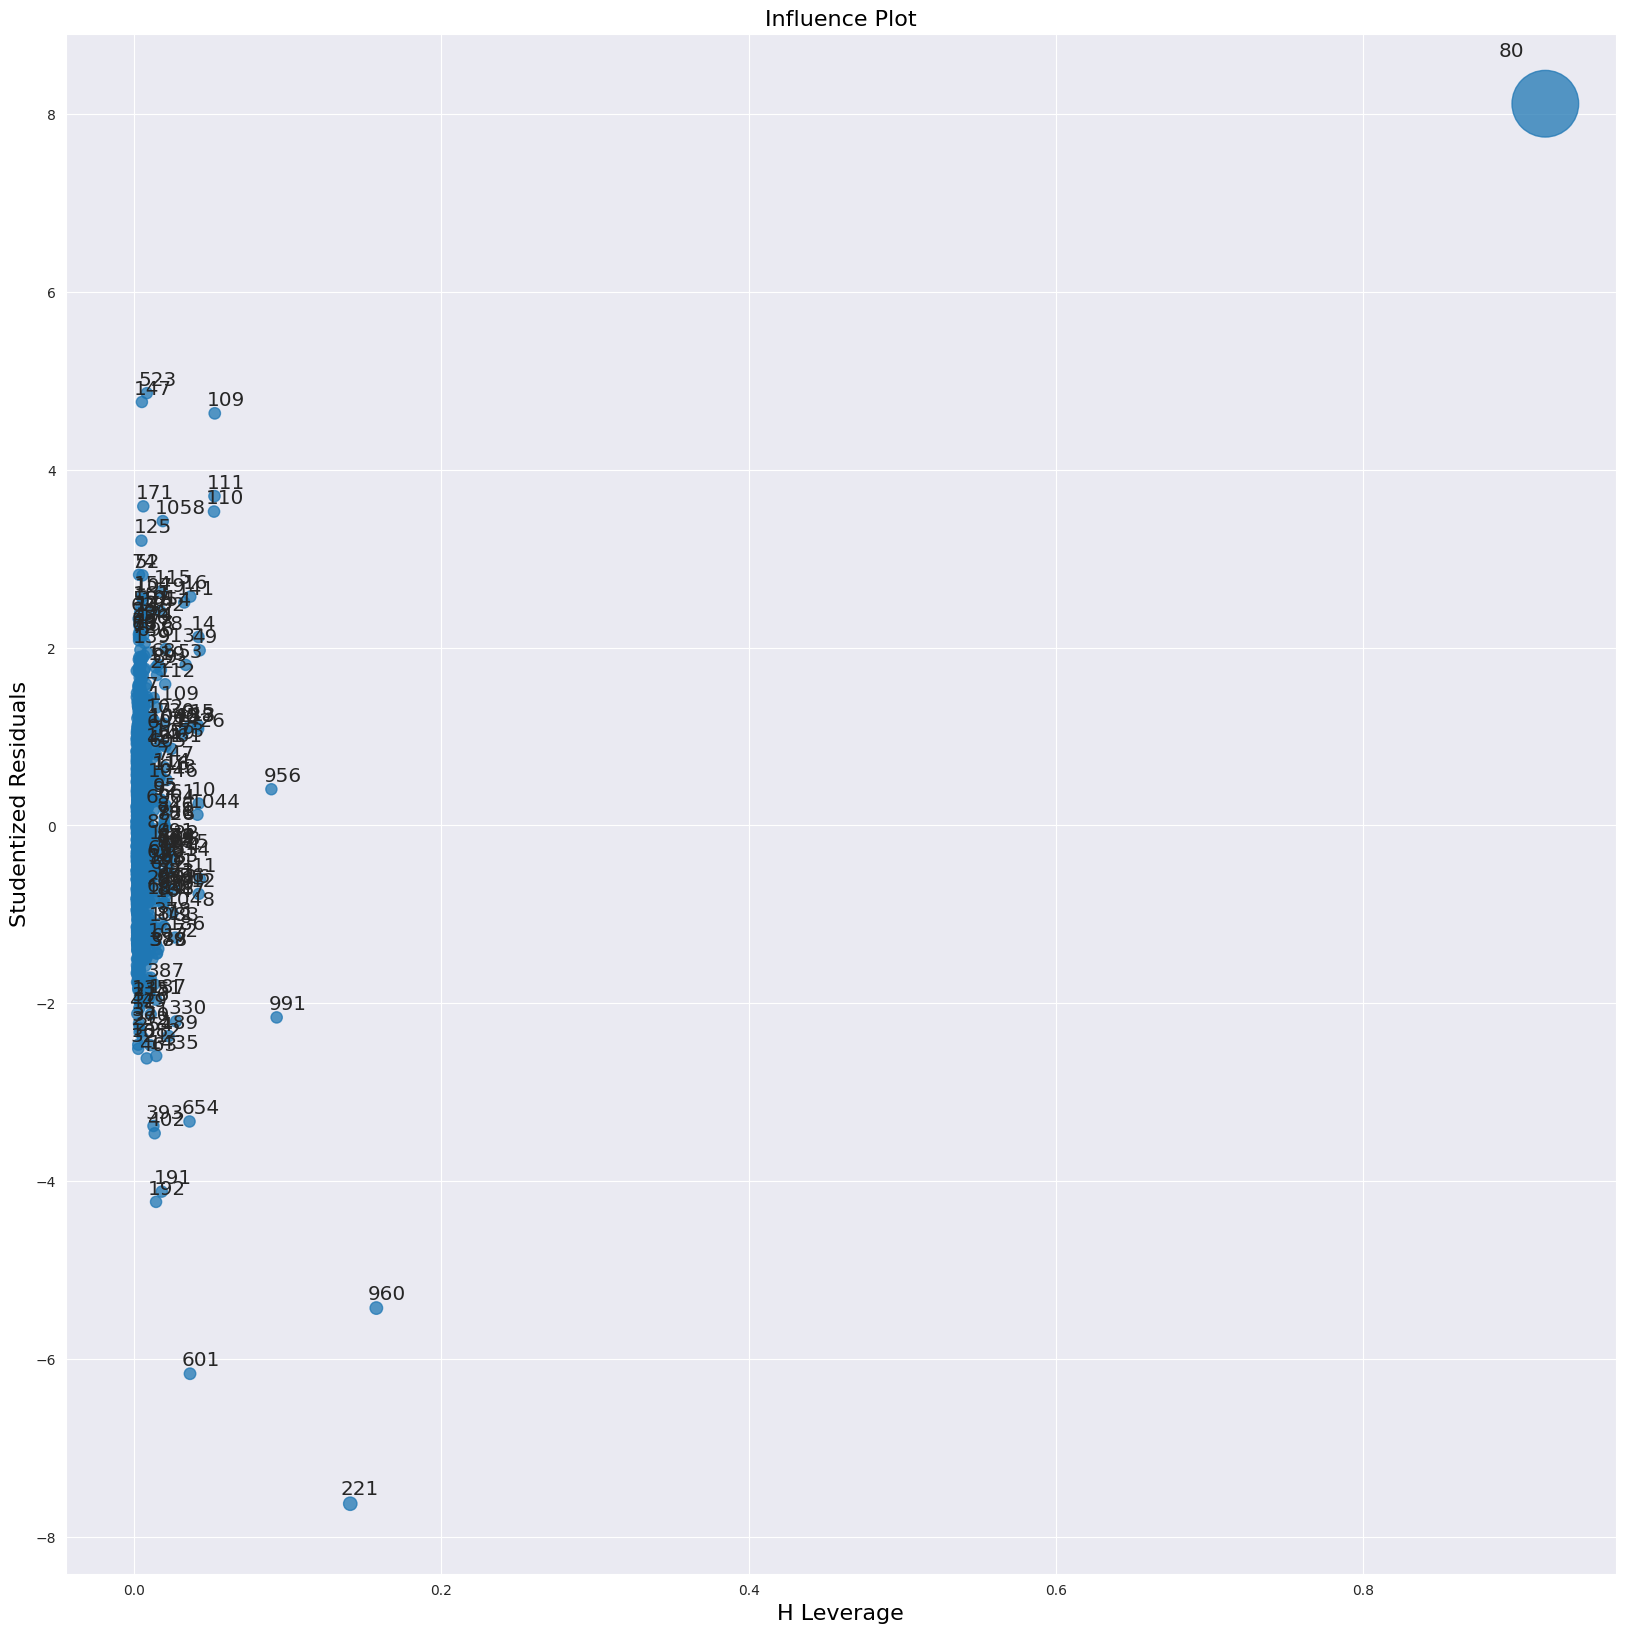

In [46]:
#high  influence plot
fig,ax=plt.subplots(figsize=(20,20))
fig = influence_plot(model,ax = ax)

In [47]:
#leverage cutoff
k = toyota4.shape[1]
n = toyota4.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

In [48]:
toyota4[toyota4.index.isin([80])]

,Price,age,KM,HP,cc,Doors,Gears,quaterlytax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [49]:
toyota_new = toyota4.copy()
toyota_new 

,Price,age,KM,HP,cc,Doors,Gears,quaterlytax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [50]:
toyota5 = toyota_new.drop(toyota_new.index[[80]],axis=0).reset_index(drop=True)
toyota5

,Price,age,KM,HP,cc,Doors,Gears,quaterlytax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [51]:
while np.max(c)>0.5:
  model = smf.ols('Price~age+KM+HP+cc+Doors+Gears+Weight+quaterlytax',data=toyota5).fit()
  (c,_) = model.get_influence().cooks_distance
  c
  np.argmax(c) , np.max(c)
  toyota5 = toyota5.drop(toyota5.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
  toyota5
else:
  final_model = smf.ols('Price~age+KM+HP+cc+Doors+Gears+Weight+quaterlytax',data=toyota5).fit()  
  final_model.rsquared , final_model.aic
  print("this is final model after correction",final_model.rsquared)

this is final model after correction 0.8882395145171204


In [52]:
toyota5.columns

Index(['Price', 'age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'quaterlytax',
       'Weight'],
      dtype='object')

In [53]:
final_model.rsquared

0.8882395145171204

In [54]:
toyota5

,Price,age,KM,HP,cc,Doors,Gears,quaterlytax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


Model prediction

In [73]:
final_model.predict(toyota5) #manual

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64

In [75]:
pred = final_model.predict(toyota5)
pred
#predection with 90.025 

0       16345.352610
1       15886.635544
2       16328.224968
3       15996.318854
4       15883.424182
            ...     
1426     9161.230587
1427     8536.091326
1428     8681.531063
1429     8793.668694
1430    10860.695492
Length: 1431, dtype: float64